In [65]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



from dbn import SupervisedDBNClassification

In [45]:
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)

In [46]:
input_columns = ["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed"]
output_column = ["conditions"]
X = df[input_columns]
Y = df[output_column]
X = X.to_numpy()
le = LabelEncoder()
Y = le.fit_transform(Y)

c:\Users\Alaric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [50]:
Y_train

array([3, 1, 3, ..., 3, 3, 3])

In [51]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=10,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
history = classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 13635145120349956096.000000
>> Epoch 2 finished 	RBM Reconstruction error 11959.815105
>> Epoch 3 finished 	RBM Reconstruction error 11959.815105
>> Epoch 4 finished 	RBM Reconstruction error 11959.815105
>> Epoch 5 finished 	RBM Reconstruction error 11959.815105
>> Epoch 6 finished 	RBM Reconstruction error 11959.815105
>> Epoch 7 finished 	RBM Reconstruction error 11959.815105
>> Epoch 8 finished 	RBM Reconstruction error 11959.815105
>> Epoch 9 finished 	RBM Reconstruction error 3391.778879
>> Epoch 10 finished 	RBM Reconstruction error 231.246722
>> Epoch 1 finished 	RBM Reconstruction error 0.000000
>> Epoch 2 finished 	RBM Reconstruction error 0.000000
>> Epoch 3 finished 	RBM Reconstruction error 0.000000
>> Epoch 4 finished 	RBM Reconstruction error 0.000000
>> Epoch 5 finished 	RBM Reconstruction error 0.000000
>> Epoch 6 finished 	RBM Reconstruction error 0.000000
>> Epoch 7 finished 	RBM Reconstruction 

In [61]:
label_mapping = {x: y for x, y in zip(le.transform(le.classes_), le.classes_)}
lm = list(label_mapping.values())

label_mapping

{0: 'Overcast',
 1: 'Partially cloudy',
 2: 'Rain, Overcast',
 3: 'Rain, Partially cloudy'}

# Training Result

In [69]:
Y_pred_train = classifier.predict(X_train)
CM = confusion_matrix(Y_pred_train, Y_train)


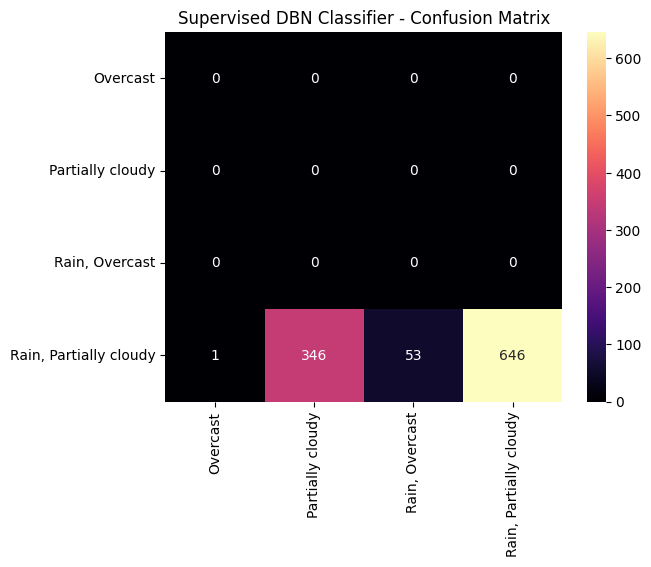

In [74]:
# Plot Confusion Matrix using Seaborn + PyPlot
ax = plt.subplot()
ax.set_title("Supervised DBN Classifier - Confusion Matrix")
sns.heatmap(CM, annot=True, cmap="magma", ax=ax, fmt='d')
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [75]:
Y_pred = classifier.predict(X_test)